In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import re
import numpy as np

In [2]:
movies_path = 'outputs/movies.xlsx'
directors_path = 'outputs/directors_info.csv'
movies_data = pd.read_excel(movies_path)
directors_data = pd.read_csv(directors_path)

In [3]:
directors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5255 entries, 0 to 5254
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        5255 non-null   object 
 1   category    5255 non-null   object 
 2   movie_name  5255 non-null   object 
 3   rating      2896 non-null   float64
 4   url         5255 non-null   object 
dtypes: float64(1), object(4)
memory usage: 205.4+ KB


In [4]:
directors_data.head()

,name,category,movie_name,rating,url
0,J.J. Perry,stunts,Avatar: El sentido del agua,7.5,https://www.imdb.com/title/tt1630029/?ref_=nm_...
1,J.J. Perry,stunts,Samaritan,5.7,https://www.imdb.com/title/tt5500218/?ref_=nm_...
2,J.J. Perry,stunts,Fast & Furious 9,5.2,https://www.imdb.com/title/tt5433138/?ref_=nm_...
3,J.J. Perry,stunts,Sombra y hueso,7.5,https://www.imdb.com/title/tt2403776/?ref_=nm_...
4,J.J. Perry,stunts,Falcon y el Soldado de Invierno,7.1,https://www.imdb.com/title/tt9208876/?ref_=nm_...


In [5]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       473 non-null    object 
 1   url         473 non-null    object 
 2   imdbRating  228 non-null    object 
 3   imdbVotes   228 non-null    object 
 4   metascore   7 non-null      float64
 5   directors   473 non-null    object 
 6   thespians   473 non-null    object 
dtypes: float64(1), object(6)
memory usage: 26.0+ KB


In [6]:
movies_data.head()

,title,url,imdbRating,imdbVotes,metascore,directors,thespians
0,1. The Penguin Lessons,https://www.imdb.com/title/tt26677014/,"7,3",(655),58.0,[],[]
1,2. La fiebre de los ricos,https://www.imdb.com/title/tt17677434/,"5,5","(5,4 mil)",NaN,[],[]
2,3. El juego del asesino,https://www.imdb.com/title/tt0327785/,"5,8",(17 mil),36.0,"[{'name': 'J.J. Perry', 'url': 'https://www.im...","[{'name': 'Dave Bautista', 'url': 'https://www..."
3,4. La habitación de al lado,https://www.imdb.com/title/tt29439114/,"6,8",(19 mil),70.0,[],[]
4,5. Hechizados,https://www.imdb.com/title/tt7215232/,"5,6","(7,1 mil)",54.0,"[{'name': 'Vicky Jenson', 'url': 'https://www....","[{'name': 'Rachel Zegler', 'url': 'https://www..."


# Data Cleaning

## movies


### title: remove indexing

In [7]:
movies_data['title_parsed'] = movies_data['title'].apply(lambda x: re.sub(r'^\d+\.\s*', '', x))

### imdbRating: Convert to float

In [8]:
movies_data['imdbRating_float'] = movies_data['imdbRating'].str.replace(',', '.').astype(float)

### imdbVotes: remove non-numeric characters and convert to float

In [9]:
def parse_votes(v):
    if pd.isna(v):
        return np.nan
    v = v.replace('\xa0', '').replace('(', '').replace(')', '').replace(',', '.')
    if 'mil' in v:
        v = float(v.replace('mil', ''))
        v = v * 1000000
    return pd.to_numeric(v)
movies_data['imdbVotes_float'] = movies_data['imdbVotes'].apply(parse_votes)

### directors: parse directors names

In [10]:
parsed_directors = []
for directors_list in movies_data['directors']:
    directors_list = ast.literal_eval(directors_list)
    if len(directors_list) == 0:
        parsed_directors.append([])
    else:
        parsed_directors.append([obj['name'] for obj in directors_list])
movies_data['directors_parsed'] = parsed_directors

### thespians: parse thespians names

In [11]:
parsed_thespians = []
for thespians_list in movies_data['thespians']:
    thespians_list = ast.literal_eval(thespians_list)
    if len(thespians_list) == 0:
        parsed_thespians.append([])
    else:
        parsed_thespians.append([obj['name'] for obj in thespians_list])
movies_data['thespians_parsed'] = parsed_thespians

### Processed movies

In [12]:
movies_processed = movies_data[['title_parsed', 'imdbRating_float', 'imdbVotes_float', 'metascore', 'directors_parsed', 'thespians_parsed']]

In [13]:
movies_processed = movies_processed[(movies_processed['imdbRating_float'].notna())
                 & (movies_processed['imdbVotes_float'].notna())]
movies_processed['imdbVotes_log'] = np.log(movies_processed['imdbVotes_float'])

In [14]:
movies_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 0 to 463
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_parsed      228 non-null    object 
 1   imdbRating_float  228 non-null    float64
 2   imdbVotes_float   228 non-null    float64
 3   metascore         7 non-null      float64
 4   directors_parsed  228 non-null    object 
 5   thespians_parsed  228 non-null    object 
 6   imdbVotes_log     228 non-null    float64
dtypes: float64(4), object(3)
memory usage: 14.2+ KB


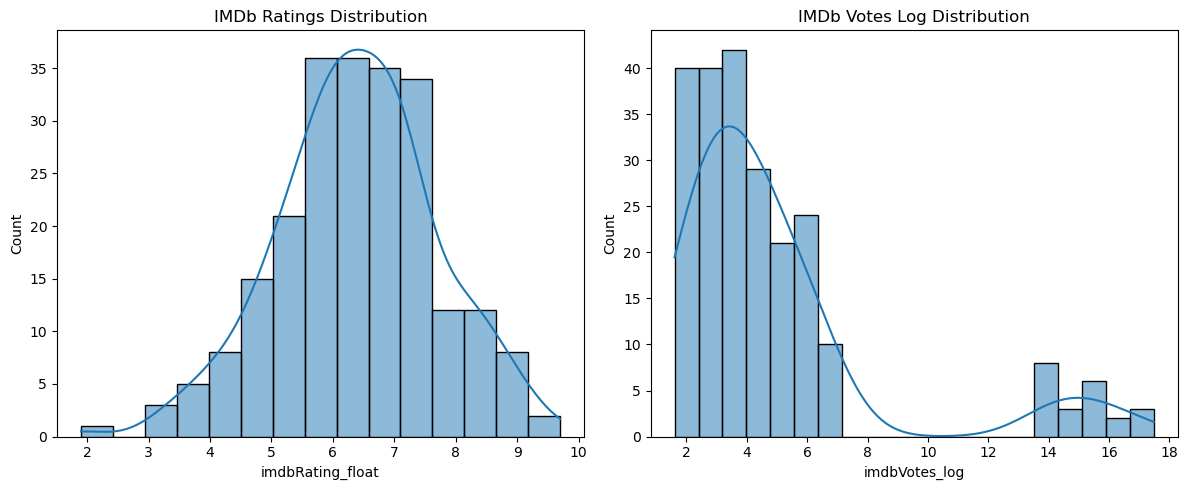

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(movies_processed['imdbRating_float'], bins=15, kde=True)
plt.title('IMDb Ratings Distribution')

plt.subplot(1, 2, 2)
sns.histplot(movies_processed['imdbVotes_log'], bins=20, kde=True)
plt.title('IMDb Votes Log Distribution')
plt.tight_layout()
plt.show()

In [34]:
movies_processed[['imdbRating_float', 'imdbVotes_float']].describe()

,imdbRating_float,imdbVotes_float
count,228.000000,2.280000e+02
mean,6.388596,6.900243e+05
std,1.292115,3.510508e+06
min,1.900000,5.000000e+00
25%,5.600000,1.600000e+01
50%,6.400000,4.650000e+01
75%,7.200000,2.475000e+02
max,9.700000,3.900000e+07


### Possible questions:

1. What are the top-rated movies with the fewest votes?

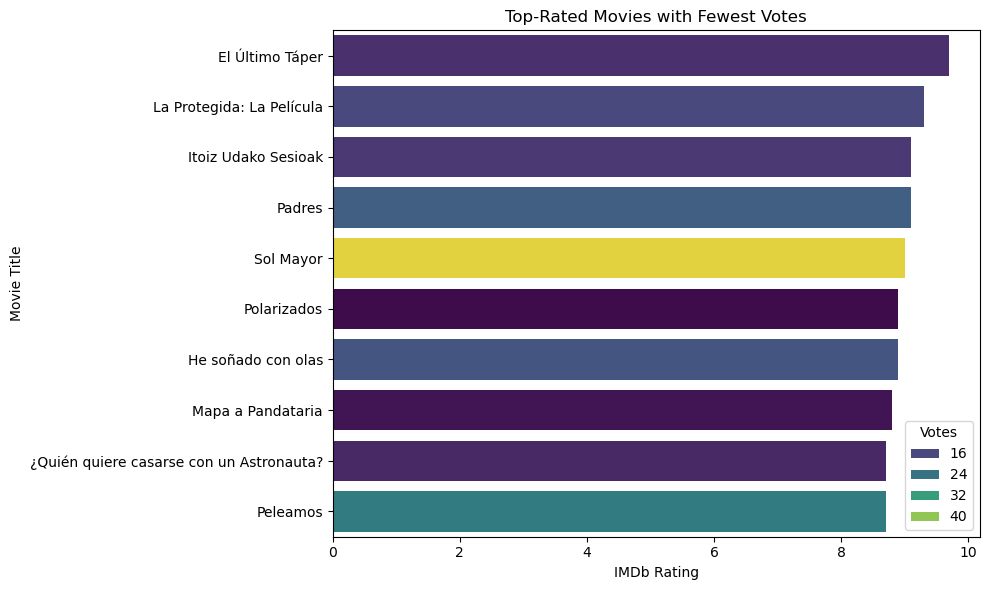

In [ ]:
# top-rated movies with the fewest votes
top_rated_low_votes = movies_processed.sort_values(by=['imdbRating_float', 'imdbVotes_float'], ascending=[False, True]).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_rated_low_votes,
    y='title_parsed',
    x='imdbRating_float',
    hue='imdbVotes_float',
    dodge=False,
    palette='viridis'
)
plt.title("Top-Rated Movies with Fewest Votes")
plt.xlabel("IMDb Rating")
plt.ylabel("Movie Title")
plt.legend(title="Votes")
plt.tight_layout()
plt.show()

# top_rated_low_votes[['title', 'imdbRating', 'imdbVotes_clean']]


These titles may be underrated movies or highly rated by small, niche audiences. More votes might change their rankings significantly.

2. Highly voted movies tend to have higher rates?

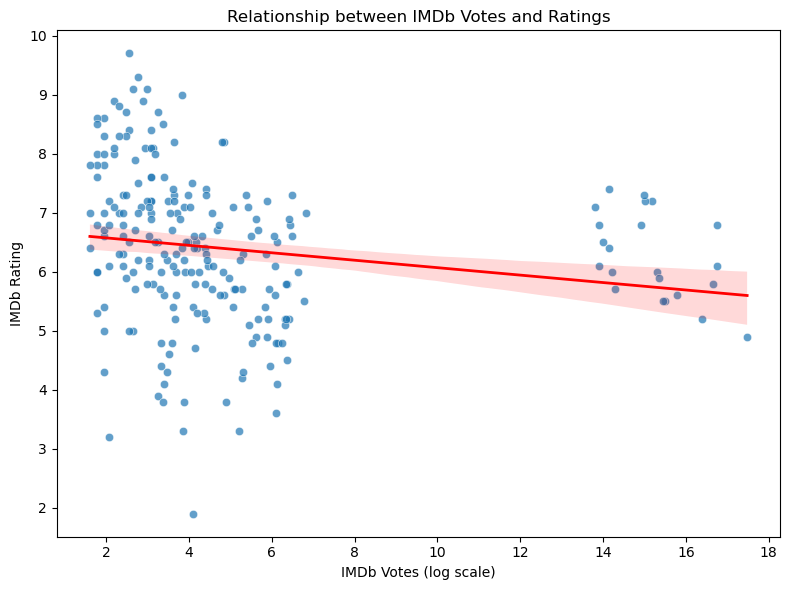

-0.08678526375437197

In [27]:
# relationship between votes and ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=movies_processed,
    x='imdbVotes_log',
    y='imdbRating_float',
    alpha=0.7
)
sns.regplot(
    data=movies_processed,
    x='imdbVotes_log',
    y='imdbRating_float',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2}
)
plt.title("Relationship between IMDb Votes and Ratings")
plt.xlabel("IMDb Votes (log scale)")
plt.ylabel("IMDb Rating")
plt.tight_layout()
plt.show()

# Correlation between votes and ratings
correlation = movies_processed['imdbVotes_float'].corr(movies_processed['imdbRating_float'])
correlation


Popularity does not predict quality (in this dataset).

3. Which directors are associated with the highest-rated or most-voted movies?

/tmp/ipykernel_24632/1357596360.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated_directors[:10], x='directors_parsed', y='avg_rating', palette='coolwarm')


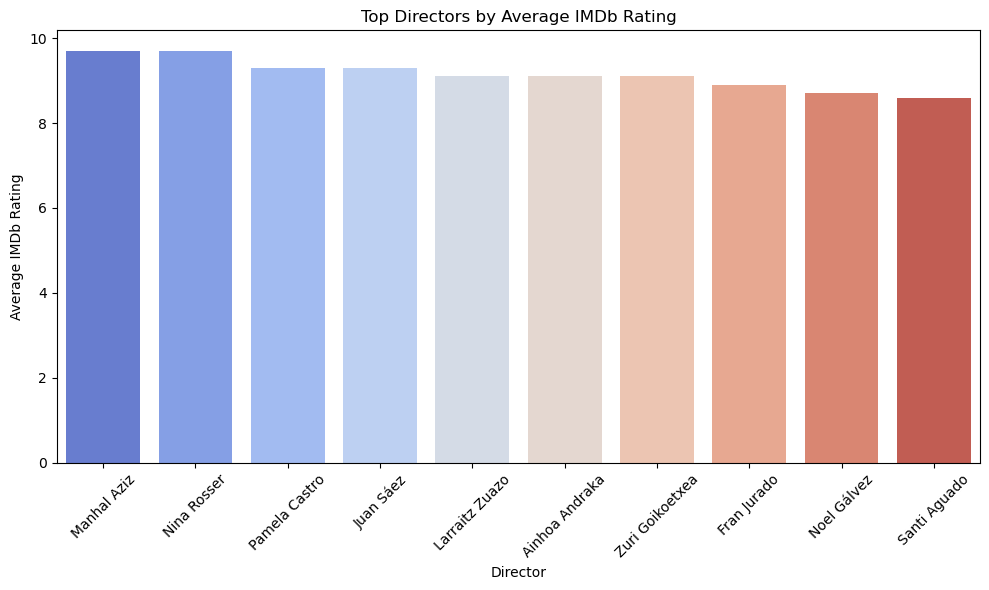

In [70]:
directors_stats = movies_processed.explode('directors_parsed').groupby('directors_parsed').agg({
    'imdbRating_float': 'mean',
    'imdbVotes_float': 'sum',
    'title_parsed': 'count'
}).rename(columns={
    'imdbRating_float': 'avg_rating',
    'imdbVotes_float': 'total_votes',
    'title_parsed': 'movie_count'
}).reset_index()

top_rated_directors = directors_stats.sort_values(by='avg_rating', ascending=False)
top_voted_directors = directors_stats.sort_values(by='total_votes', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated_directors[:10], x='directors_parsed', y='avg_rating', palette='coolwarm')
plt.title("Top Directors by Average IMDb Rating")
plt.xlabel("Director")
plt.ylabel("Average IMDb Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_24632/3625694493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_voted_directors[:10], x='directors_parsed', y='total_votes', palette='coolwarm')


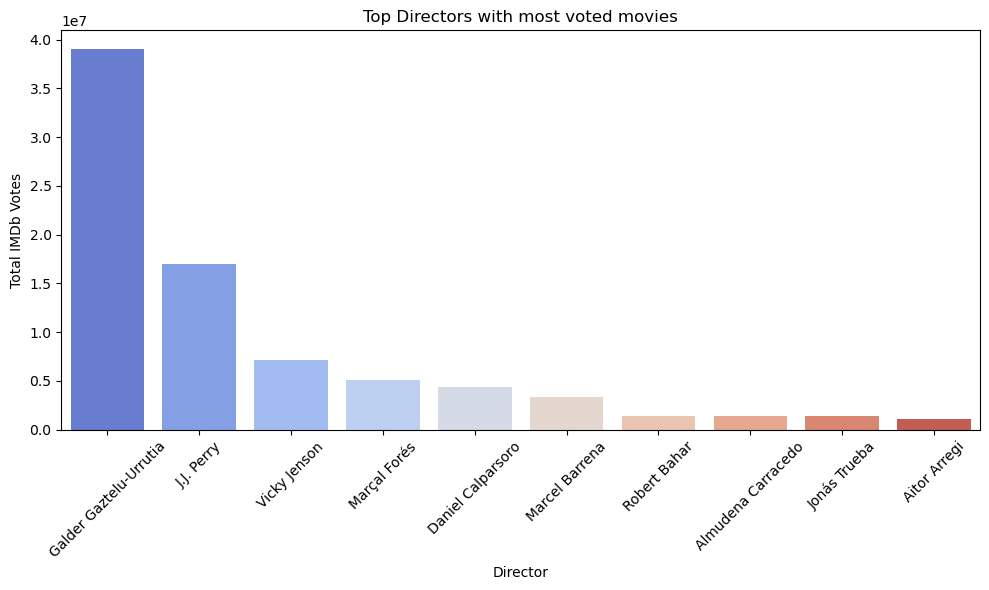

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_voted_directors[:10], x='directors_parsed', y='total_votes', palette='coolwarm')
plt.title("Top Directors with most voted movies")
plt.xlabel("Director")
plt.ylabel("Total IMDb Votes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()